## The data set came from 'UNITED STATES DEPARTMENT OF LABOR', https://www.bls.gov/oes/
## It shows the average annual wage of each occupation of each state in 2018

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows',None)

In [2]:
url = 'https://raw.githubusercontent.com/LEOYYX/iv_assignment2/master/state_M2018_dl.csv'

In [3]:
dfdata = pd.read_csv(url)
dfdata.head()

,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,AL,Alabama,00-0000,All Occupations,total,"1,943,760",0.4,1000.000,1.00,...,16.22,25.63,38.28,"18,030","22,400","33,740","53,310","79,630",NaN,NaN
1,1,AL,Alabama,11-0000,Management Occupations,major,"73,860",1.1,38.001,0.72,...,46.01,63.87,90.06,"48,650","68,030","95,710","132,860","187,330",NaN,NaN
2,1,AL,Alabama,11-1011,Chief Executives,detailed,"1,390",5.6,0.716,0.53,...,91.31,#,#,"79,530","125,570","189,920",#,#,NaN,NaN
3,1,AL,Alabama,11-1021,General and Operations Managers,detailed,"28,600",1.8,14.712,0.93,...,48.55,70.79,#,"50,180","68,990","100,980","147,250",#,NaN,NaN
4,1,AL,Alabama,11-1031,Legislators,detailed,970,6.4,0.498,1.43,...,*,*,*,"16,310","17,390","19,210","32,290","63,390",True,NaN


In [4]:
dfdata.shape

(36897, 25)

In [5]:
dfdata2 = dfdata[dfdata.OCC_GROUP == 'total']
dfdata3 = dfdata2.drop(['ANNUAL','HOURLY'],axis = 1)
dfdata3 = dfdata3.reset_index(drop=True)
dfdata3

,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,1,AL,Alabama,00-0000,All Occupations,total,"1,943,760",0.4,1000.000,1.00,...,8.67,10.77,16.22,25.63,38.28,"18,030","22,400","33,740","53,310","79,630"
1,2,AK,Alaska,00-0000,All Occupations,total,"315,250",0.8,1000.000,1.00,...,11.62,15.40,23.09,35.32,49.56,"24,180","32,020","48,020","73,460","103,080"
2,4,AZ,Arizona,00-0000,All Occupations,total,"2,789,520",0.5,1000.000,1.00,...,10.80,12.21,17.80,28.20,43.62,"22,470","25,410","37,020","58,660","90,730"
3,5,AR,Arkansas,00-0000,All Occupations,total,"1,210,120",0.6,1000.000,1.00,...,9.19,10.75,15.31,23.62,35.25,"19,110","22,360","31,850","49,140","73,310"
4,6,CA,California,00-0000,All Occupations,total,"17,007,690",0.2,1000.000,1.00,...,11.34,13.38,20.40,35.15,56.54,"23,590","27,830","42,430","73,110","117,590"
5,8,CO,Colorado,00-0000,All Occupations,total,"2,620,640",0.3,1000.000,1.00,...,10.81,13.51,20.34,32.49,50.05,"22,480","28,110","42,310","67,570","104,110"
6,9,CT,Connecticut,00-0000,All Occupations,total,"1,660,200",0.6,1000.000,1.00,...,11.25,14.12,22.56,36.09,53.25,"23,390","29,360","46,920","75,060","110,770"
7,10,DE,Delaware,00-0000,All Occupations,total,"448,510",1.1,1000.000,1.00,...,9.65,12.46,19.18,31.41,48.34,"20,070","25,920","39,900","65,330","100,550"
8,11,DC,District of Columbia,00-0000,All Occupations,total,"712,370",0.8,1000.000,1.00,...,13.78,20.05,34.46,56.65,78.94,"28,660","41,700","71,690","117,820","164,200"
9,12,FL,Florida,00-0000,All Occupations,total,"8,608,660",0.6,1000.000,1.00,...,9.28,11.41,16.62,26.18,39.66,"19,290","23,730","34,560","54,450","82,490"


In [6]:
dfdata4 = dfdata3[['ST','A_MEAN']]
dfdata4 = dfdata4.reset_index(drop=True)
dfdata4 = dfdata4.drop([8,51,52,53])

In [7]:
dfdata4['A_MEAN'] = pd.to_numeric(dfdata4['A_MEAN'])

## The choropleth map of average annual wage in United States in 2018

In [8]:
import folium

In [9]:
import pandas as pd


url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=dfdata4,
    columns=['ST', 'A_MEAN'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.9,
    line_opacity=0.3,
    legend_name='Mean annual wage'
).add_to(m)


folium.LayerControl().add_to(m)

m


### We can find that the mean annual wages in east and wet coast are relatively higher, we also can see that Colorado's wage level is high in the inland areas. Next step, I want to find the relationship between different occupations and annual wage.

In [10]:
dfdata.head()

,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,AL,Alabama,00-0000,All Occupations,total,"1,943,760",0.4,1000.000,1.00,...,16.22,25.63,38.28,"18,030","22,400","33,740","53,310","79,630",NaN,NaN
1,1,AL,Alabama,11-0000,Management Occupations,major,"73,860",1.1,38.001,0.72,...,46.01,63.87,90.06,"48,650","68,030","95,710","132,860","187,330",NaN,NaN
2,1,AL,Alabama,11-1011,Chief Executives,detailed,"1,390",5.6,0.716,0.53,...,91.31,#,#,"79,530","125,570","189,920",#,#,NaN,NaN
3,1,AL,Alabama,11-1021,General and Operations Managers,detailed,"28,600",1.8,14.712,0.93,...,48.55,70.79,#,"50,180","68,990","100,980","147,250",#,NaN,NaN
4,1,AL,Alabama,11-1031,Legislators,detailed,970,6.4,0.498,1.43,...,*,*,*,"16,310","17,390","19,210","32,290","63,390",True,NaN


In [11]:
dfdataoc = dfdata[['OCC_TITLE','A_MEAN']]
dfdataoc=dfdataoc[~dfdataoc['A_MEAN'].isin(['*','#'])]
dfdataoc.head()

,OCC_TITLE,A_MEAN
0,All Occupations,43790
1,Management Occupations,109680
2,Chief Executives,204590
3,General and Operations Managers,118440
4,Legislators,31760


In [12]:
dfdataoc['A_MEAN'] = pd.to_numeric(dfdataoc['A_MEAN'])
dfdataocsort = dfdataoc.groupby('OCC_TITLE').mean()
dfdataocsort

,A_MEAN
OCC_TITLE,
Accountants and Auditors,72290.555556
Actuaries,108944.166667
Adhesive Bonding Machine Operators and Tenders,35224.146341
"Administrative Law Judges, Adjudicators, and Hearing Officers",95293.478261
Administrative Services Managers,97535.925926
Adult Basic and Secondary Education and Literacy Teachers and Instructors,50778.269231
Advertising Sales Agents,55612.115385
Advertising and Promotions Managers,112403.125000
Aerospace Engineering and Operations Technicians,68496.521739


In [13]:
dfdataocsortDE = dfdataocsort.sort_values(by="A_MEAN",ascending=False).head(10)
dfdataocsortDE

,A_MEAN
OCC_TITLE,
Surgeons,258500.000000
Anesthesiologists,251305.882353
Obstetricians and Gynecologists,244153.913043
Oral and Maxillofacial Surgeons,222524.375000
Orthodontists,217598.846154
"Internists, General",216369.800000
Family and General Practitioners,210913.846154
Psychiatrists,210343.750000
"Physicians and Surgeons, All Other",208563.962264


In [14]:
dfdataocsortDE.reset_index(inplace=True)
dfdataocsortDE

,OCC_TITLE,A_MEAN
0,Surgeons,258500.000000
1,Anesthesiologists,251305.882353
2,Obstetricians and Gynecologists,244153.913043
3,Oral and Maxillofacial Surgeons,222524.375000
4,Orthodontists,217598.846154
5,"Internists, General",216369.800000
6,Family and General Practitioners,210913.846154
7,Psychiatrists,210343.750000
8,"Physicians and Surgeons, All Other",208563.962264
9,Prosthodontists,203875.000000


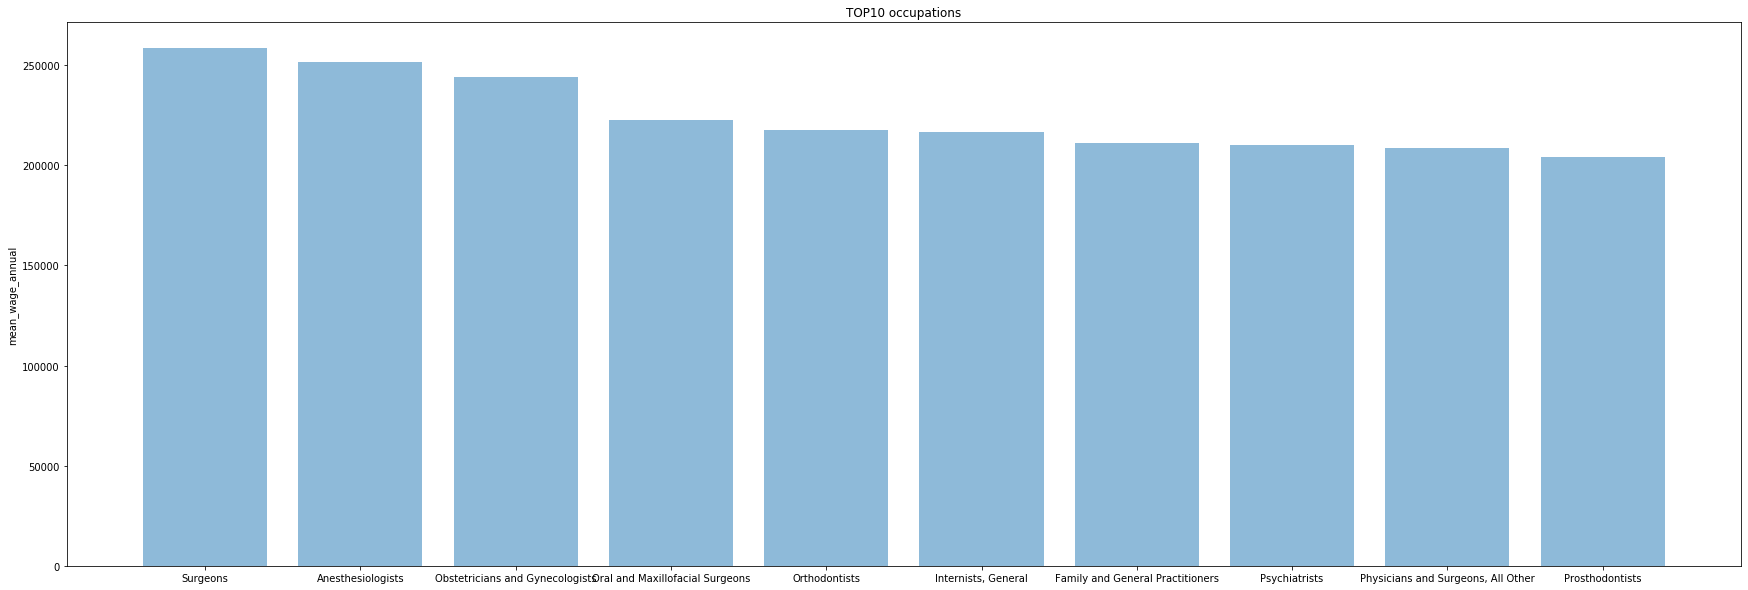

In [15]:
y_pos = np.arange(len(dfdataocsortDE['OCC_TITLE']))

plt.figure(figsize=(30,10))
plt.bar(y_pos, dfdataocsortDE['A_MEAN'], align='center', alpha=0.5)
plt.xticks(y_pos, dfdataocsortDE['OCC_TITLE'])
plt.ylabel('mean_wage_annual')
plt.title('TOP10 occupations')

plt.show()

### We can see that the top 10 highest salary occupations are all clinician related occupation. It means in United States, clinicians are high-paying jobs.

In [16]:
dfdataocsortAS = dfdataocsort.sort_values(by="A_MEAN",ascending=True).head(10)
dfdataocsortAS.reset_index(inplace=True)
dfdataocsortAS

,OCC_TITLE,A_MEAN
0,Shampooers,22127.619048
1,"Combined Food Preparation and Serving Workers,...",22150.555556
2,"Ushers, Lobby Attendants, and Ticket Takers",22415.000000
3,Dishwashers,22471.296296
4,"Counter Attendants, Cafeteria, Food Concession...",22486.851852
5,"Cooks, Fast Food",22539.814815
6,"Hosts and Hostesses, Restaurant, Lounge, and C...",22640.740741
7,Dining Room and Cafeteria Attendants and Barte...,22829.811321
8,Cashiers,23056.481481
9,Amusement and Recreation Attendants,23122.592593


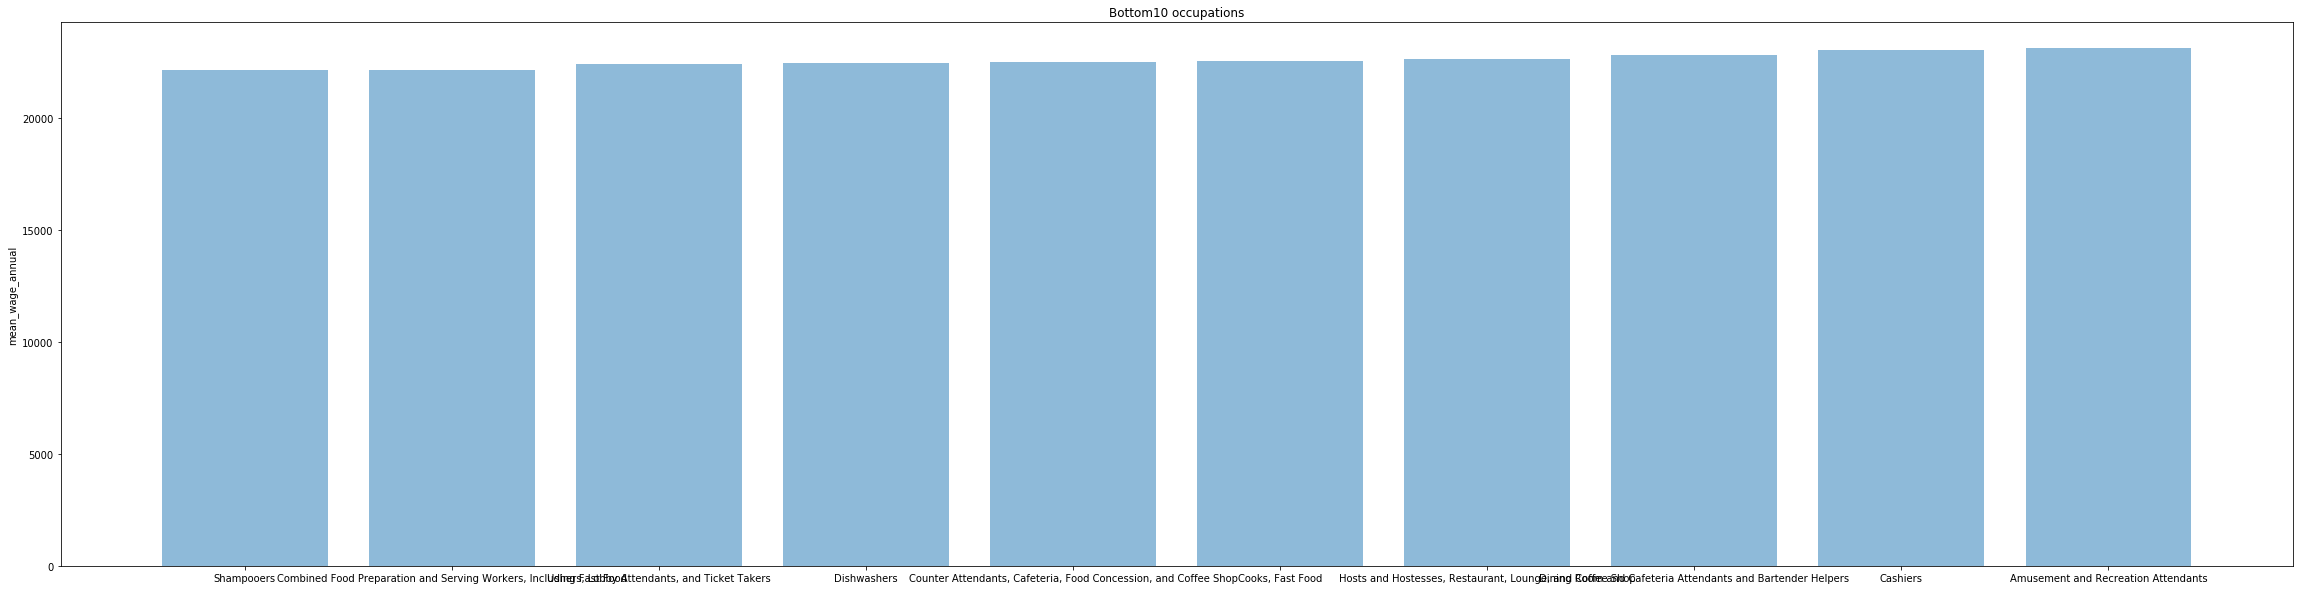

In [17]:
y_pos = np.arange(len(dfdataocsortAS['OCC_TITLE']))

plt.figure(figsize=(40,10))
plt.bar(y_pos, dfdataocsortAS['A_MEAN'], align='center', alpha=0.5)
plt.xticks(y_pos, dfdataocsortAS['OCC_TITLE'])
plt.ylabel('mean_wage_annual')
plt.title('Bottom10 occupations')

plt.show()

### From the plot we can find that the bottom 10 salary occupations are all jobs with low level of knowledge and low thresholds.